## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [61]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [53]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)

### Check Observations and Variables

**Q1** How many **observations** are there?

**Q2** How many **variables** are there?

In [54]:
##observations is the first number (row), variables is the second (column) 
print(f"There are {DF.shape[0]} observations.")
print(f"There are {DF.shape[1]} variables.")

There are 10000 observations.
There are 55 variables.


**There are 10000 observations.**
**There are 55 variables.**

### Reduce the number of variables

In [55]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units?
2. Is the data numerical? If so is it continuous or discrete?
3. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

**loan_amount:
1.) The numerical amount of the loan in U.S. dollars 
2.) Yes the data is numerical, it is discrete since all values are integers
3.) No it is not categorical**

**intrest rate: 
1.) A percentage of the loan charged per period
2.) Yes the data is numerical, it is continuous
3.) No it is not categorical**

**term: 
1.) The number of months of the loan the applicant received
2.) Yes the data is numerical, it is discrete since all values are integers
3.) No it is not categorical**

**grade: 
1.) The loan letter grade (A, B, C, etc.)
2.) No the data is not numerical 
3.) Yes the data is categorical, it is ordinal**

**state:
1.) The two letter abbreviation of the state
2.) No the data is not numerical 
3.) Yes the data is categorical, it is nominal**

**annual income: 
1.) The amount of money the loan recipient makes in a year (U.S. dollars)
2.) Yes the data is numerical, it is discrete since all values are integers
3.) No it is not categorical**

**homeownership: 
1.) Describes type of ownership the recipient holds (Owner, Renter, etc.)
2.) No the data is not numerical 
3.) Yes the data is categorical, it is ordinal**

**debt_to_income: 
1.) The debt to income ratio
2.) Yes the data is numerical, it is continuous
3.) No it is not categorical**

### Here is Example Code for a simple Histogram

In [56]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


In [57]:
fig = px.histogram(DF,
                   nbins=100,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()


**Yes there are good choices and bad choices, if your nbins is too small you don't get the full picture of the dataset whereas if its too large you can't accurately analyze the dataset, finding a good medium is neede dwhen plotting the histogram. For. this example nbins = 100 works perfectly**

**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


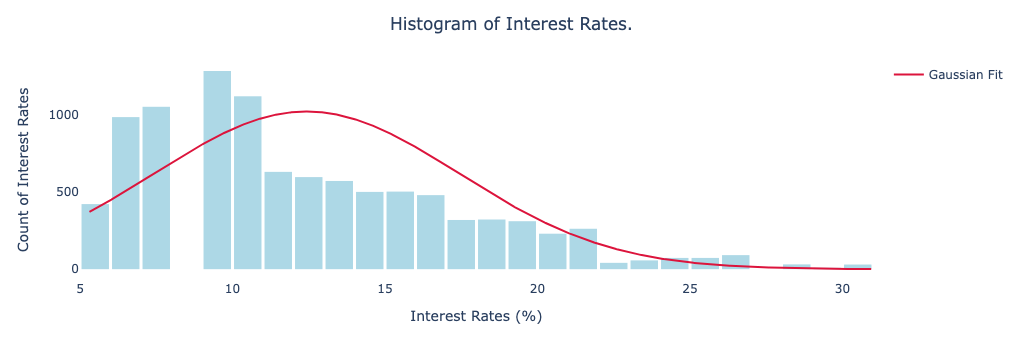

In [69]:
iavg = average(DF['interest_rate'])
std = DF['interest_rate'].std()

# Generate x values for Gaussian curve
irange = np.linspace(DF['interest_rate'].min(), DF['interest_rate'].max(), 1000)

# Gaussian function values
gaussian = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((irange - iavg) / std) ** 2)

# Scale Gaussian to match histogram's area
hist_vals, bin_edges = np.histogram(DF['interest_rate'], bins=20)
bin_width = bin_edges[1] - bin_edges[0]
scale_factor = len(DF) * bin_width
gaussian_scaled = gaussian * scale_factor


fig = px.histogram(DF,
                   nbins=50,
                   x='interest_rate',
                   color_discrete_sequence=['lightblue'])


fig = go.Figure(fig)

# Add Gaussian curve
fig.add_trace(go.Scatter(x=irange, y=gaussian_scaled,
                         mode='lines',
                         name='Gaussian Fit',
                         line=dict(color='crimson', width=2)))

fig.update_layout(bargap=0.1,
                  title='Histogram of Interest Rates.',
                  title_x=0.5,
                  plot_bgcolor='white',
                  xaxis_title="Interest Rates (%)",
                  yaxis_title="Count of Interest Rates",
                  paper_bgcolor='white')

fig.show()


### Here is example code for a histogram with a box plot included.

In [ ]:
fig = px.histogram(DF,
                   nbins=9,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="violin"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

**Changing the marginal="violin" from marginal="box" changes the overall shape of the box plat where it now takes the less rigid shape of a violin, while keeping the marginal as "box" made it so the data was presented in a rectangular shape.**

In [ ]:
counts = DF['homeownership'].value_counts()
show(counts)

**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [ ]:
counts = DF['grade'].value_counts()
show(counts)

### Here is example code for a bar plot

In [ ]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))

fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

In [ ]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(bargap=0.1,
                  title='Bar Graph of Homeownership',
                  title_x=0.5,
                  xaxis_title="Homeownership Type",
                  yaxis_title="Count of Homeownership Type",
                  legend_title="Homeownership",
                  autosize=True,
                  height=600,
                  width=500)
fig.show()

**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

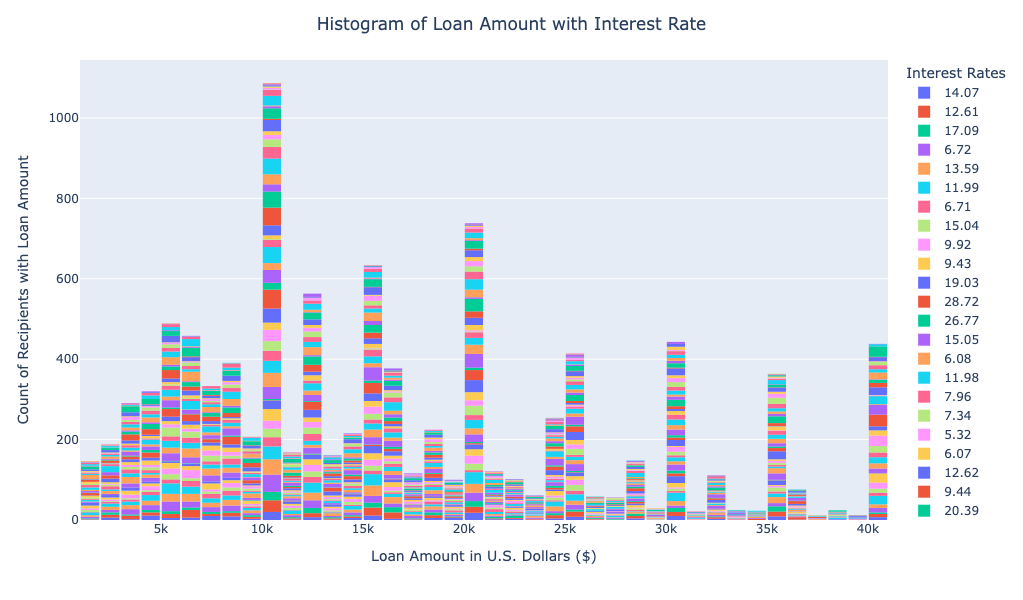

In [88]:
fig = px.histogram(DF,
            x='loan_amount',
            color='interest_rate')

fig.update_traces(dict(marker_line_width=0))
fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Amount with Interest Rate',
                  title_x=0.5,
                  xaxis_title="Loan Amount in U.S. Dollars ($)",
                  yaxis_title="Count of Recipients with Loan Amount",
                  legend_title="Interest Rates",
                  autosize=True,
                  height=600,
                  width=500)
fig.show()


### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [101]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
DF_new['smoke100'] = DF_new['smoke100'].replace({1:'Yes', 0:'No'})
DF_new.rename(columns={'smoke100': 'Smoke'}, inplace=True)
show(DF_new)

Loading ITables v2.5.2 from the internet... (need help?)


In [ ]:
DF_new

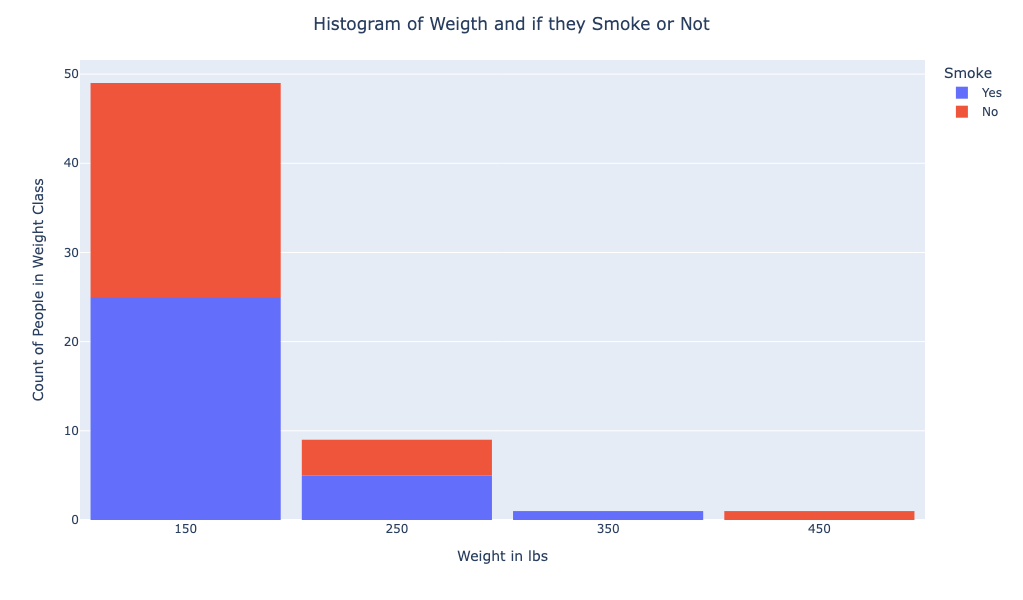

In [103]:
fig = px.histogram(DF_new,
                  x='weight',
                  nbins=5,
                  color='Smoke')

fig.update_layout(bargap=0.1,
                  title='Histogram of Weigth and if they Smoke or Not',
                  title_x=0.5,
                  xaxis_title="Weight in lbs",
                  yaxis_title="Count of People in Weight Class",
                  autosize=True,
                  width=500,
                  height=600)

fig.show()

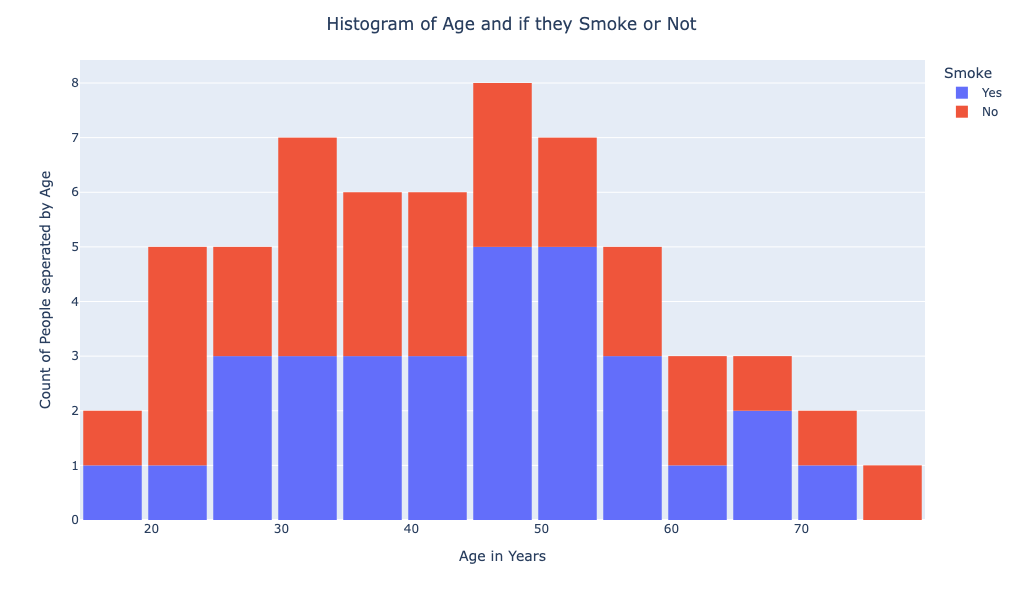

In [105]:
fig = px.histogram(DF_new,
                  x='age',
                  nbins=20,
                  color='Smoke')

fig.update_layout(bargap=0.1,
                  title='Histogram of Age and if they Smoke or Not',
                  title_x=0.5,
                  xaxis_title="Age in Years",
                  yaxis_title="Count of People seperated by Age",
                  autosize=True,
                  width=500,
                  height=600)

fig.show()